Accuracy:  1.0
sim_pred_1:[0 0 0 0 0 1 1 1 1 1]
sim_pred_2:[0 0 0 0 0 0 0 0 0 0]
sim_pred_3:[1 0 0 0 0 0 0 0 0 0]
sim_pred_4:[1 1 1 1 1 0 0 0 0 0]
sim_pred_5:[1 1 1 1 1 1 1 1 1 1]


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

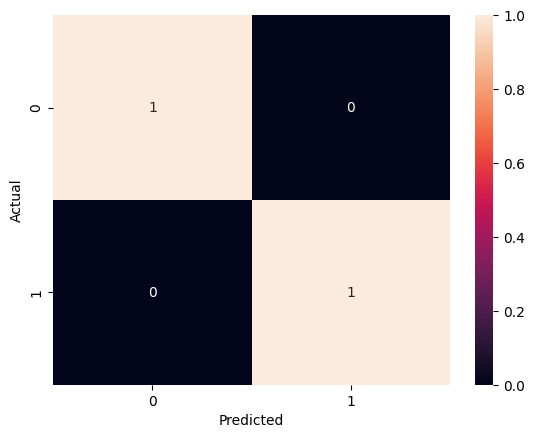

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

# Information from Google Scholar
ieee_fellow = {'phd': [15, 24,  10, 1, 6,  4,  2,  4,  9,  1, 1,  6,  25, 1, 7,  9],
            'five':   [51, 109, 16, 4, 89, 47, 23, 18, 32, 4, 14, 33, 82, 9, 14, 91],
            'gt':     [1,  1,   1,  0, 0,  0,  0,  0,  0,  0, 1,  1,  1,  1, 0,  1]}
df = pd.DataFrame(ieee_fellow, columns = ['phd', 'five','gt'])
x = df[['phd', 'five']]
y = df['gt']


sim_data_1 = {'phd': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'five': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
sim_data_1 = pd.DataFrame(sim_data_1, columns= ['phd', 'five'])

sim_data_2 = {'phd': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 
              'five': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]}
sim_data_2 = pd.DataFrame(sim_data_2, columns= ['phd', 'five'])

sim_data_3 = {'phd': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 
              'five': [6, 16, 26, 36, 46, 56, 66, 76, 86, 96]}
sim_data_3 = pd.DataFrame(sim_data_3, columns= ['phd', 'five'])

sim_data_4 = {'phd': [7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 
              'five': [7, 17, 27, 37, 47, 57, 67, 77, 87, 97]}
sim_data_4 = pd.DataFrame(sim_data_4, columns= ['phd', 'five'])

sim_data_5 = {'phd': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 
              'five': [8, 18, 28, 38, 48, 58, 68, 78, 88, 98]}
sim_data_5 = pd.DataFrame(sim_data_5, columns= ['phd', 'five'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

sim_pred_1 = logistic_regression.predict(sim_data_1)
print("sim_pred_1:" + str(sim_pred_1))

sim_pred_2 = logistic_regression.predict(sim_data_2)
print("sim_pred_2:" + str(sim_pred_2))

sim_pred_3 = logistic_regression.predict(sim_data_3)
print("sim_pred_3:" + str(sim_pred_3))

sim_pred_4 = logistic_regression.predict(sim_data_4)
print("sim_pred_4:" + str(sim_pred_4))

sim_pred_5 = logistic_regression.predict(sim_data_5)
print("sim_pred_5:" + str(sim_pred_5))


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
